In [ ]:
print("Беляев Евгений Валерьевич")
print("20БИ-2")
!ln -fs /usr/share/zoneinfo/Europe/Moscow /etc/localtime
!date

Беляев Евгений Валерьевич
20БИ-2
Tue Mar 23 17:24:53 MSK 2021


In [38]:
#связь с диском и открытие таблицы

from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.getcwd())
print(os.listdir('./'))
print(os.listdir('/content/drive'))
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/swot'))
%ll -lF /content/drive/MyDrive/"Colab Notebooks"/swot
from oauth2client.client import GoogleCredentials
gs = gspread.authorize(GoogleCredentials.get_application_default())
table = gs.open_by_key('1eyKAnrIGESkF_5K7kDg2xMZEr2xf2EvIV-tFhBDMhGg') 
!ln -fs /usr/share/zoneinfo/Europe/Moscow /etc/localtime
!date

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
['.config', 'adc.json', 'drive', 'sample_data']
['.shortcut-targets-by-id', 'MyDrive', '.file-revisions-by-id', '.Trash']
['swot.gsheet', 'swot_dictionary.json']
total 1
-rw------- 1 root 236 Mar 23 18:35 swot_dictionary.json
-rw------- 1 root 151 Mar 23 18:23 swot.gsheet
Tue Mar 23 18:36:36 MSK 2021


strengths
1 ['создание качественного продукта', '10', '1', '10']
2 ['минимизация налогов ', '5', '0.2', '1']
3 ['возможность получения прибыли', '10', '0.5', '5']
4 ['возможность помощи детям', '10', '0.9', '9']
Values:  [[10.0], [1.0], [5.0], [9.0]]
Result:  25.0


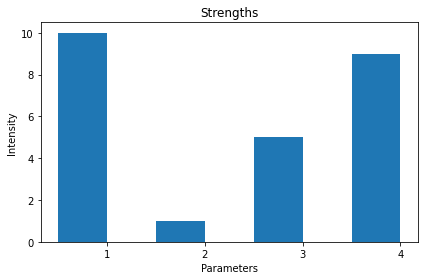

1  -  создание качественного продукта
2  -  минимизация налогов 
3  -  возможность получения прибыли
4  -  возможность помощи детям


In [33]:
#strengths
print("strengths")
worksheet = table.worksheet("strengths")
rows = worksheet.get_all_values()
strength = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i = 0
for row in rows:
  if (0 < i < 6):
    print(i, row)
    strength.append(row[0])
    importance.append(int(row[1]))
    probability.append(float(row[2]))
    power.append(int(row[1]) * float(row[2]))
    power_raw = list()
    power_raw.append(int(row[1]) * float(row[2]))
    power_sh.append(power_raw)
  i += 1
print('Values: ', power_sh)
worksheet.update('D2:D100', power_sh)
result = sum(power)
print('Result: ', result)
 
 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i = 0
line = list()
cols = worksheet.col_values(1)
for col in cols:
  if (i > 0):
    line.append(i)
  i+=1
powers = power
x = np.arange(len(line))
width = 0.5
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, powers, width)
a = worksheet.col_values(1)
ax.set_ylabel('Intensity')
ax.set_title('Strengths')
ax.set_xlabel('Parameters')
ax.set_xticks(x)
ax.set_xticklabels(line)
fig.tight_layout()
plt.show()

k = 0
for col in cols:
  if (k > 0):
    print(k, ' - ', col)
  k += 1

weaknesses
1 ['отсутствие опыта работы с детьми ', '9', '0.8', '7.2']
2 ['отсутствие клиентской базы', '9', '0.8', '7.2']
3 ['недостаток финансовых ресурсов', '8', '0.5', '4']
4 ['нехватка кадров', '6', '0.3', '1.8']
Values:  [[7.2], [7.2], [4.0], [1.7999999999999998]]
Result:  20.2


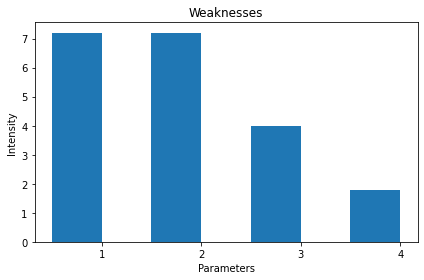

1  -  отсутствие опыта работы с детьми 
2  -  отсутствие клиентской базы
3  -  недостаток финансовых ресурсов
4  -  нехватка кадров


In [34]:
#weaknesses
print("weaknesses")
worksheet = table.worksheet("weaknesses")
rows = worksheet.get_all_values()
weaknesses = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i = 0
for row in rows:
  if (0 < i < 5):
    print(i, row)
    weaknesses.append(row[0])
    importance.append(int(row[1]))
    probability.append(float(row[2]))
    power.append(int(row[1]) * float(row[2]))
    power_raw = list()
    power_raw.append(int(row[1]) * float(row[2]))
    power_sh.append(power_raw)
  i += 1
print('Values: ', power_sh)
worksheet.update('D2:D100', power_sh)
result = sum(power)
print('Result: ', result)
 
 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i = 0
line = list()
cols = worksheet.col_values(1)
for col in cols:
  if (i > 0):
    line.append(i)
  i+=1
powers = power
x = np.arange(len(line))
width = 0.5
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, powers, width)
a = worksheet.col_values(1)
ax.set_ylabel('Intensity')
ax.set_title('Weaknesses')
ax.set_xlabel('Parameters')
ax.set_xticks(x)
ax.set_xticklabels(line)
fig.tight_layout()
plt.show()

k = 0
for col in cols:
  if (k > 0):
    print(k, ' - ', col)
  k += 1

opportunities
1 ['спрос на услугу', '5', '0.5', '2.5']
2 ['возможность быстро организовать процесс ', '3', '0.6', '1.8']
3 ['уникальность услуги ', '10', '1', '10']
4 ['желание работать с детьми ', '10', '1', '10']
Values:  [[2.5], [1.7999999999999998], [10.0], [10.0]]
Result:  24.3


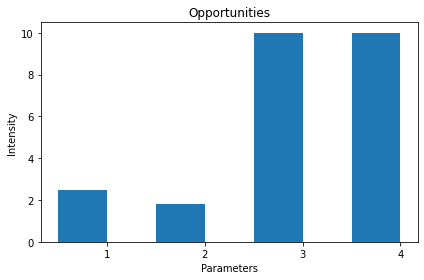

1  -  спрос на услугу
2  -  возможность быстро организовать процесс 
3  -  уникальность услуги 
4  -  желание работать с детьми 


In [35]:
#opportunities
print("opportunities")
worksheet = table.worksheet("opportunities")
rows = worksheet.get_all_values()
opportunities = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i = 0
for row in rows:
  if (0 < i < 5):
    print(i, row)
    opportunities.append(row[0])
    importance.append(int(row[1]))
    probability.append(float(row[2]))
    power.append(int(row[1]) * float(row[2]))
    power_raw = list()
    power_raw.append(int(row[1]) * float(row[2]))
    power_sh.append(power_raw)
  i += 1
print('Values: ', power_sh)
worksheet.update('D2:D100', power_sh)
result = sum(power)
print('Result: ', result)
 
 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i = 0
line = list()
cols = worksheet.col_values(1)
for col in cols:
  if (i > 0):
    line.append(i)
  i+=1
powers = power
x = np.arange(len(line))
width = 0.5
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, powers, width)
a = worksheet.col_values(1)
ax.set_ylabel('Intensity')
ax.set_title('Opportunities')
ax.set_xlabel('Parameters')
ax.set_xticks(x)
ax.set_xticklabels(line)
fig.tight_layout()
plt.show()

k = 0
for col in cols:
  if (k > 0):
    print(k, ' - ', col)
  k += 1

threats
1 ['Затруднения клиентов оплачивать услугу', '2', '0.4', '0.8', '']
2 ['Угроза вхождения на рынок новых участников', '8', '0.7', '5.6', '']
3 ['Угроза появления субститутов (заменителей )', '1', '0.9', '0.9', '']
4 ['рыночная власть покупателей', '9', '0.9', '8.1', '']
5 ['Рыночная власть поставщиков', '9', '0.1', '0.9', '']
6 ['Соперничество между действующими конкурентами', '8', '0.7', '5.6', '5.6']
Values:  [[0.8], [5.6], [0.9], [8.1], [0.9], [5.6]]
Result:  21.9


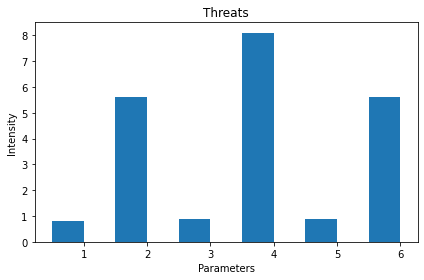

1  -  Затруднения клиентов оплачивать услугу
2  -  Угроза вхождения на рынок новых участников
3  -  Угроза появления субститутов (заменителей )
4  -  рыночная власть покупателей
5  -  Рыночная власть поставщиков
6  -  Соперничество между действующими конкурентами


In [36]:
#threats
print("threats")
worksheet = table.worksheet("threats")
rows = worksheet.get_all_values()
threats = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i = 0
for row in rows:
  if (0 < i < 7):
    print(i, row)
    threats.append(row[0])
    importance.append(int(row[1]))
    probability.append(float(row[2]))
    power.append(int(row[1]) * float(row[2]))
    power_raw = list()
    power_raw.append(int(row[1]) * float(row[2]))
    power_sh.append(power_raw)
  i += 1
print('Values: ', power_sh)
worksheet.update('D2:D100', power_sh)
result = sum(power)
print('Result: ', result)
 
 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i = 0
line = list()
cols = worksheet.col_values(1)
for col in cols:
  if (i > 0):
    line.append(i)
  i+=1
powers = power
x = np.arange(len(line))
width = 0.5
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, powers, width)
a = worksheet.col_values(1)
ax.set_ylabel('Intensity')
ax.set_title('Threats')
ax.set_xlabel('Parameters')
ax.set_xticks(x)
ax.set_xticklabels(line)
fig.tight_layout()
plt.show()

k = 0
for col in cols:
  if (k > 0):
    print(k, ' - ', col)
  k += 1

SWOT
[1, 2, 3, 4, 5] ['Strengths', 'Weaknesses', 'Opportunities', 'Threats', 'Result'] [25.0, -20.2, 24.3, -21.9, 7.200000000000003]


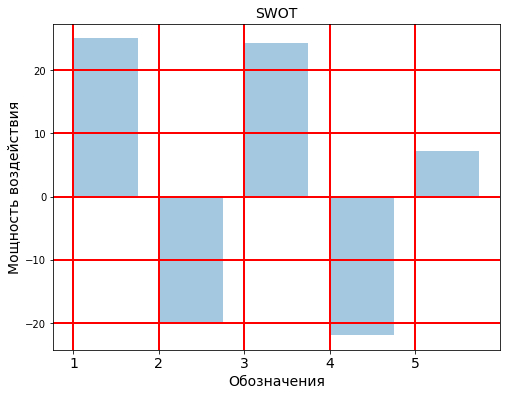

1  -  Strengths ; 
2  -  Weaknesses ; 
3  -  Opportunities ; 
4  -  Threats ; 
5  -  Result ; 


In [43]:
#общая таблица
print('SWOT')
import os
import json

def matplot(element):
  import matplotlib.pyplot as plt
  x = list()
  x_float = list()
  title = list()
  y_float = list()

  worksheet = table.worksheet('strengths')
  stren =  worksheet.acell('D8').value
  worksheet = table.worksheet('weaknesses')
  weak =  worksheet.acell('D8').value
  worksheet = table.worksheet('opportunities')
  op =  worksheet.acell('D8').value
  worksheet = table.worksheet('threats')
  thr =  worksheet.acell('D8').value
  
  worksheet = table.worksheet('summary')
  worksheet.update('B1', stren)
  stren = worksheet.acell('B1').value
  worksheet.update('B2', weak)
  weak = worksheet.acell('B2').value
  worksheet.update('B3', op)
  op = worksheet.acell('B3').value
  worksheet.update('B4', thr)
  thr = worksheet.acell('B4').value

  read_file = open('/content/drive/MyDrive/Colab Notebooks/swot/swot_dictionary.json', 'r+')
  read_file.write('{Strengths: ')
  read_file.write(stren)
  read_file.write(', Weaknesses: ')
  read_file.write(weak)
  read_file.write(', Opportunities: ')
  read_file.write(op)
  read_file.write(', Threats: ')
  read_file.write(thr)
  read_file.write('}')
  
  result = 0
  i = 0
  for line in read_file.readlines():
    i += 1
    data = json.loads(line)
    title = ["Strengths", "Weaknesses", "Opportunities", "Threats", "Result"]
    x = title
    x_float = [1, 2, 3, 4, 5]
    result = float(data['strengths']) - 1*float(data['weaknesses']) + float(data['opportunities']) - 1*float(data['threats'])
    y = [float(data['strengths']), float(data['weaknesses']), float(data['opportunities']), float(data['threats'])]
    y_float = [float(data['strengths']), -1*float(data['weaknesses']), float(data['opportunities']), -1*float(data['threats']),  result]
  print(x_float,title,y_float)

  worksheet = table.worksheet('summary')
  worksheet.update('B5', result)
  read_file.close()
  x_pos = list()
  for i in range (x_float.__len__()):
    x_pos.append(i)
  fig=plt.figure(figsize=(8,6), dpi=72)
  plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
  plt.xticks(x_pos,  x_float, fontsize=14)
  plt.xlabel('Обозначения', fontsize=14)
  plt.ylabel('Мощность воздействия', fontsize=14)
  plt.title('SWOT', fontsize=14)
  plt.grid(True, color='r', linestyle='-', linewidth=2)
  plt.show()

  for i in range(title.__len__()):
    print(i+1, " - ", title[i], "; ")
    i += 1

if __name__ == "__main__":
    element = 'swot_dictionary'
    matplot(element)